In [5]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
stocks = input("Enter the code of the stack: ")
data = yf.download(stocks, "2010-01-01", "2023-01-07", auto_adjust=True)
data.head()

Enter the code of the stack: GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,184
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,53
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,363
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,56
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,54


In [25]:
data.shape

(3274, 5)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3274 entries, 2010-01-04 to 2023-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3274 non-null   float64
 1   High    3274 non-null   float64
 2   Low     3274 non-null   float64
 3   Close   3274 non-null   float64
 4   Volume  3274 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.5 KB


In [27]:
data.describe()

,Open,High,Low,Close,Volume
count,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000
mean,1450.119518,1457.451070,1442.298656,1450.003757,5504.304826
std,249.241258,251.110750,247.397978,249.253858,29512.763160
min,1052.199951,1062.000000,1045.199951,1050.800049,0.000000
25%,1245.350037,1251.149994,1240.000000,1245.500000,44.000000
50%,1341.299988,1349.000000,1333.450012,1341.099976,153.000000
75%,1690.375031,1702.350006,1676.350006,1692.000031,496.750000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


# Data Visualizing

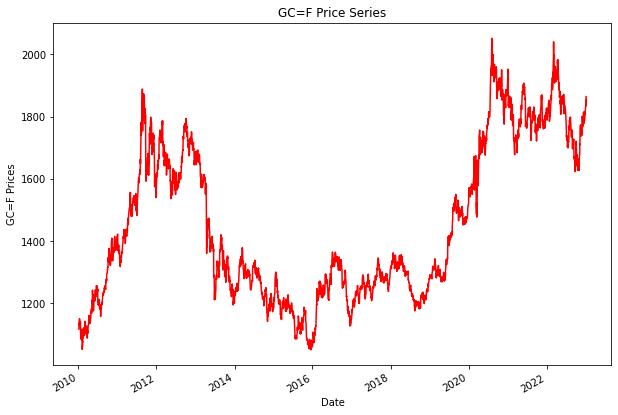

In [28]:
# Analyzing data

data.Close.plot(figsize=(10,7), color='r')  # Here 'Close' is target variable, use for telling direction of the stock --> e.g. if close is very high then your dir of a stock is very high
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))  
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_15112/3257369063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<AxesSubplot:xlabel='Close', ylabel='Density'>

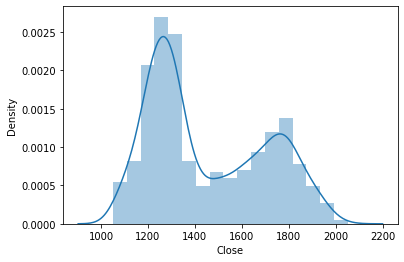

In [29]:
 sns.distplot(data["Close"])

C:\Users\Dell\AppData\Local\Temp/ipykernel_15112/3323515453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot:xlabel='Open', ylabel='Density'>

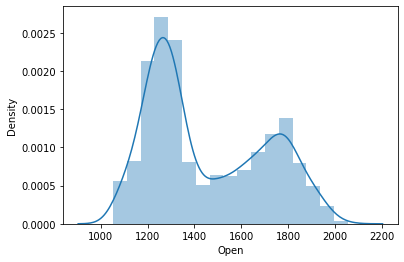

In [30]:
 sns.distplot(data["Open"])

In [31]:
# Conclusion --> what we understand till now

# - shape of the data 
# - how our data is distributed
# - its very very non linear

In [36]:
# split data 

X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2619, 4)
(655, 4)
(2619,)
(655,)


# Modeling data

In [48]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)

In [49]:
# MSE -- > Mean Squared  
# RMSE ---> sqrt(MSE) 
# r2_square ---> output = 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
    y_test -> ground truth
    y_pred -> model predicted value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)    
    print("R2_score: ", r2_scors)   

calculate_metrics(y_test, pred1)

MSE:  29.27367027828072
RMSE:  5.4105147886574265
R2_score:  0.9995413640126204


In [50]:
# Regularized Linear models

from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.374e+04, tolerance: 1.614e+04
  model = cd_fast.enet_coordinate_descent(


In [51]:
calculate_metrics(y_test, la_p)

MSE:  37.53370856716218
RMSE:  6.126476031713678
R2_score:  0.9994119524704257


In [52]:
calculate_metrics(y_test, ri_p)

MSE:  29.273627745866126
RMSE:  5.41051085812293
R2_score:  0.9995413646789836


In [53]:
# Now, here ridge value almost matches (or nearer) to lin reg. thats why we use here ridge reg to build a model

In [56]:
# Support Vector Machine (SVM)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.202 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.174 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.162 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.209 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.192 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.202 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.174 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.162 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.209 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.192 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.202 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.034 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.044 total time=   0.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.042 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.047 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.035 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.368 total time=   1.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.374 total time=   0.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.376 total time=   1.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [61]:
import joblib   # Use 'joblib' to save our model bcoz we're going to use a regularized lin. models

joblib.dump(ri, 'model.pkl')
ridge_from_joblib = joblib.load('model.pkl')